# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Open Weather url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initialize variables
rec = 1
sets = 1
city_name = []
country = []
date = []
humid = []
lat = []
lon = []
max_temp = []
wind_speed = []
clouds = []

# Print report header
print("Beginning Data Retrieval")     
print("-----------------------------")

# Built target lists
for city in cities:
    # Build query URL based on current element in units
    #query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()     
    
   
    # Print weather data
    try:
        print(f"Processing Record {rec} of {sets} | {weather_json['name']}")
        
        # Load lists with weater data
        city_name.append(weather_json['name'])
        clouds.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humid.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        if rec == 50:
          rec = 0
          sets += 1
        else:
          rec += 1
    except KeyError: 
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | Hualmay
Processing Record 2 of 1 | Hithadhoo
Processing Record 3 of 1 | Pacific Grove
Processing Record 4 of 1 | Bremerhaven
Processing Record 5 of 1 | Butaritari
Processing Record 6 of 1 | Ozinki
Processing Record 7 of 1 | Barrow
Processing Record 8 of 1 | Kaitangata
Processing Record 9 of 1 | New Norfolk
Processing Record 10 of 1 | Ushuaia
Processing Record 11 of 1 | Vrangel'
Processing Record 12 of 1 | Antofagasta
Processing Record 13 of 1 | Chokurdakh
Processing Record 14 of 1 | Ponta do Sol
City not found. Skipping...
Processing Record 15 of 1 | Alice Springs
Processing Record 16 of 1 | Ilulissat
Processing Record 17 of 1 | Vaini
Processing Record 18 of 1 | Lorengau
Processing Record 19 of 1 | Jamestown
Processing Record 20 of 1 | Bredasdorp
Processing Record 21 of 1 | Comodoro Rivadavia
Processing Record 22 of 1 | Mataura
Processing Record 23 of 1 | Rikitea
City not found. Skipping...
Processing Rec

Processing Record 50 of 4 | Laem Sing
Processing Record 0 of 5 | Vestmannaeyjar
Processing Record 1 of 5 | Qasigiannguit
Processing Record 2 of 5 | Russell
Processing Record 3 of 5 | Joanópolis
Processing Record 4 of 5 | Qaqortoq
Processing Record 5 of 5 | Ortigueira
Processing Record 6 of 5 | Oytal
Processing Record 7 of 5 | Oruzgan
Processing Record 8 of 5 | Saint-Augustin
Processing Record 9 of 5 | Hirara
Processing Record 10 of 5 | Mehamn
Processing Record 11 of 5 | Kollam
Processing Record 12 of 5 | Sokoni
Processing Record 13 of 5 | Santander
Processing Record 14 of 5 | Bambanglipuro
Processing Record 15 of 5 | Altayskoye
Processing Record 16 of 5 | Isangel
Processing Record 17 of 5 | Da Lat
Processing Record 18 of 5 | Te Anau
Processing Record 19 of 5 | Codrington
Processing Record 20 of 5 | Vanimo
City not found. Skipping...
Processing Record 21 of 5 | Hīt
Processing Record 22 of 5 | Karacaköy
Processing Record 23 of 5 | Perth
Processing Record 24 of 5 | Garden City
Processing 

City not found. Skipping...
Processing Record 50 of 8 | Kysyl-Syr
Processing Record 0 of 9 | Mbarara
Processing Record 1 of 9 | Mastic Beach
Processing Record 2 of 9 | Rørvik
Processing Record 3 of 9 | Alofi
Processing Record 4 of 9 | Flinders
Processing Record 5 of 9 | Siniscola
Processing Record 6 of 9 | Peterhead
Processing Record 7 of 9 | Campestre
Processing Record 8 of 9 | Tekirdağ
Processing Record 9 of 9 | El Dorado
Processing Record 10 of 9 | Bagarji
Processing Record 11 of 9 | Coquimbo
Processing Record 12 of 9 | Kamaishi
Processing Record 13 of 9 | Umluj
Processing Record 14 of 9 | Anloga
Processing Record 15 of 9 | Tibagi
Processing Record 16 of 9 | Bundibugyo
Processing Record 17 of 9 | Mozarlândia
Processing Record 18 of 9 | Yar-Sale
Processing Record 19 of 9 | Tuatapere
Processing Record 20 of 9 | Sheremet'yevskiy
Processing Record 21 of 9 | Palu
Processing Record 22 of 9 | Conakry
Processing Record 23 of 9 | Salmās
Processing Record 24 of 9 | Labuhan
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert weather data to dataframe

weather_pd = pd.DataFrame({
                            "City": city_name,
                            "Cloudiness": clouds,
                            "Country": country,
                            "Date": date,
                            "Humidity": humid,
                            "Lat": lat,
                            "Lon": lon,
                            "Max Temp": max_temp,
                            "Max Temp K": max_temp,
                            "Wind Speed": wind_speed
                          })

# Give index a name and change Temp to float
weather_pd.index.name = 'City_ID'
weather_pd["Max Temp"] = round(((weather_pd["Max Temp"].astype(float)*1.80 )- 459.67),0).astype(int)

# Create and export csv file
weather_pd.to_csv(output_data_file)

# Display dataframe
weather_pd.head(5)


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Max Temp K,Wind Speed
City_ID,,,,,,,,,,
0,Hualmay,35,PE,1593224740,85,-11.10,-77.61,62,289.62,3.67
1,Hithadhoo,99,MV,1593224741,71,-0.60,73.08,84,302.24,2.32
2,Pacific Grove,90,US,1593224741,82,36.62,-121.92,61,289.15,4.10
3,Bremerhaven,42,DE,1593224741,82,53.55,8.58,66,292.04,3.10
4,Butaritari,95,KI,1593224741,74,3.07,172.79,83,301.65,4.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

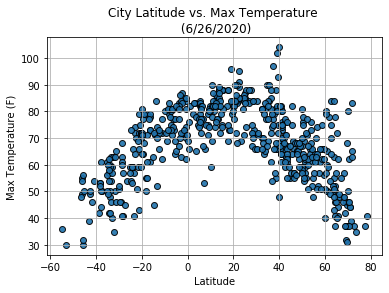

In [5]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Max Temp"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature \n {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsTemp")
plt.show()


The code is analyzing the temperatures as you move away from the equator.

#### Latitude vs. Humidity Plot

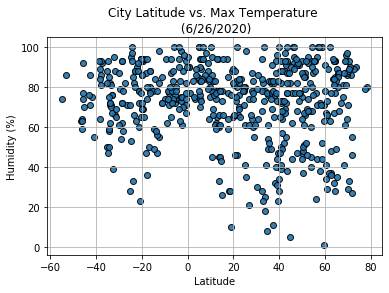

In [6]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Humidity"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Max Temperature \n {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsHumidity")
plt.show()


The code is analyzing the humidity percentages as you move away from the equator.

#### Latitude vs. Cloudiness Plot

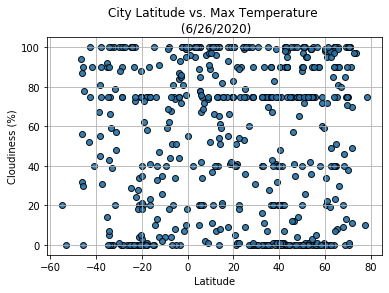

In [7]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Cloudiness"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Max Temperature \n {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsCloudy")
plt.show()

The code is analyzing the cloudiness percent as you move away from the equator.

#### Latitude vs. Wind Speed Plot

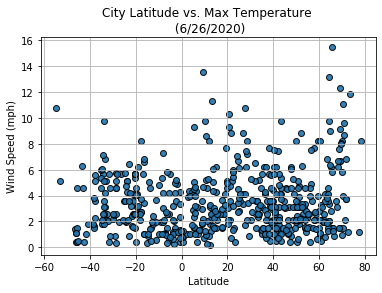

In [8]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Wind Speed"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Max Temperature \n {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsWind")
plt.show()

The code is analyzing the wind speed as you move away from the equator.

## Linear Regression

In [9]:
# Create north and south dataframe
weather_north_pd = weather_pd[weather_pd["Lat"] >= 0]
weather_south_pd = weather_pd[weather_pd["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6807141604195209


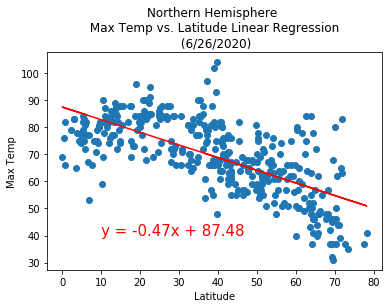

In [10]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Max Temp"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere \n Max Temp vs. Latitude Linear Regression \n {cur_date}")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsTempNorth")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7772010187807484


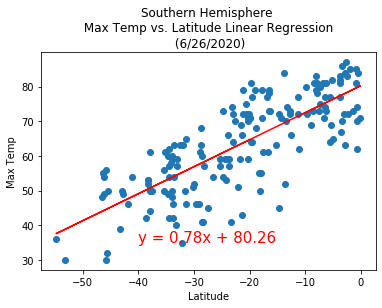

In [11]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Max Temp"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere \n Max Temp vs. Latitude Linear Regression \n {cur_date}")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsTempSouth")
plt.show()

Maximum temperatures tend to be highest at the equator dropping as you move away in each direction.  
The data seems to be related. The R value is high.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06409099568663185


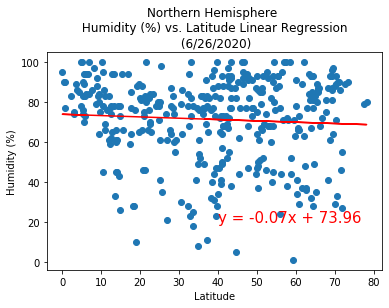

In [12]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Humidity"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere \n Humidity (%) vs. Latitude Linear Regression \n {cur_date}")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHumidityNorth")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11755737400155965


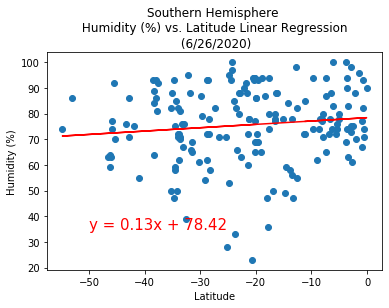

In [13]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Humidity"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere \n Humidity (%) vs. Latitude Linear Regression \n {cur_date}")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHumiditySouth")
plt.show()

Humidity percentages are unrelated as you move away unrelated as you move away from the eqautor in each direction. 
This is supported by the low R value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06820263666779848


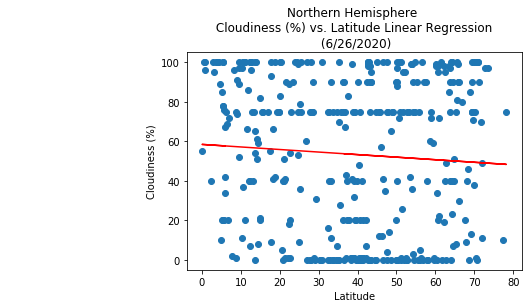

In [14]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Cloudiness"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere \n Cloudiness (%) vs. Latitude Linear Regression \n {cur_date}")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHCloudyNorth")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05217360536346463


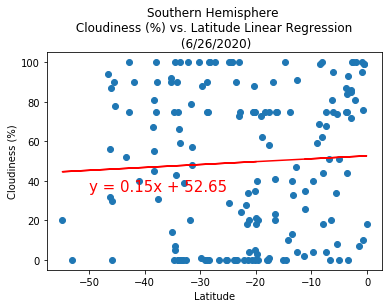

In [15]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Cloudiness"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere \n Cloudiness (%) vs. Latitude Linear Regression \n {cur_date}")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsCloudySouth")
plt.show()

Cloudiness percentages are unrelated as you move away from the eqautor in each direction. 
This is supported by the low R value.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11015272665379003


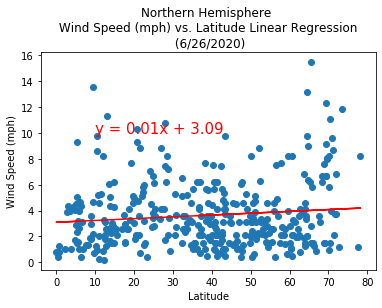

In [16]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Wind Speed"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression \n {cur_date}")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsWindNorth")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18111672279262478


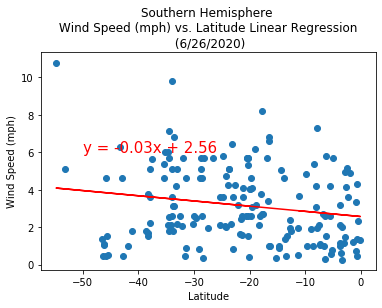

In [17]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Wind Speed"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere \n Wind Speed (mph) vs. Latitude Linear Regression \n {cur_date}")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsWindSouth")
plt.show()

Wind speed seems unrelated as you move away from the equator in each direction. This is supported by the low R value.